# Flight Delays
## by Vijay Raj Saravanan

The data set contains information about flights timings of year 2008. Information includes estimate arrival and departure times, actual arrival times and departure times, estimated and actual elapsed times, cancellation reasons and taxi time. The target feature of this dataset is the number of minutes delayed in arrival.

In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

%matplotlib inline

## Load data set 

In [2]:
flights_data = pd.read_csv("2008.csv")

## Explore data set

In [3]:
flights_data.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
flights_data.tail(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,NaN,0,1.0,0.0,19.0,0.0,79.0
7009719,2008,12,13,6,638.0,640,808.0,753,DL,1632,...,14.0,26.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0
7009720,2008,12,13,6,756.0,800,1032.0,1026,DL,1633,...,23.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009721,2008,12,13,6,612.0,615,923.0,907,DL,1635,...,5.0,23.0,0,NaN,0,0.0,0.0,16.0,0.0,0.0
7009722,2008,12,13,6,749.0,750,901.0,859,DL,1636,...,20.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Shape of dataset

In [5]:
flights_data.shape

(7009728, 29)

## Use info() to see null values and dtypes

In [6]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


## Data Wrangling

### Quality Issues

<ul>
    <li>Duplicate rows exist</li>
    <li>Irregular column names</li>
    <li>Month, day, year to a single column</li>
    <li>deptime feature should be date time data type</li>
    <li>crsdeptime feature should be date time data type</li>
    <li>crsarrtime feature should be date time data type</li>
    <li>arrtime feature should be date time data type</li>
    <li>Null values in deptime feature</li>
    <li>Null values in arrtime feature</li>
    <li>Null values in tailnum feature</li>
    <li>Null values in actualelapsedtime feature</li>
    <li>Null values in crselapsedtime feature </li>
    <li>Null values in airtime feature</li>
    <li>Null values in arrdelay feature</li>
    <li>Null values in taxiin feature</li>
    <li>Null values in taxiout feature</li>
    <li>Null values in cancellationcode feature</li>
    <li>Null values in delay types</li>
    <li>Convert actualelapsedtime, crselapsedtime, airtime, arrdelay, depdelay, carrierdely, weatherdelay, nasdelay, securitydelay, lateaircraftdelay features to hours</li>
</ul>    

## Duplicate data

In [7]:
flights_data.duplicated().sum()

4

In [8]:
flights_data.drop_duplicates(inplace=True)
flights_data.duplicated().sum()

0

## Standardize column names

In [9]:
default_cols = list(flights_data.columns)
lower_colnames = [name.lower() for name in default_cols]
flights_data.columns = lower_colnames

In [10]:
flights_data.columns

Index(['year', 'month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime',
       'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum', 'tailnum',
       'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

## Remove unnecessary columns

In [11]:
flights_data.drop(["flightnum", "tailnum", "flightnum"] ,axis=1, inplace=True)


## Convert categorical variables to category datatype

In [12]:
flights_data["year"] = flights_data.year.astype("category")
flights_data["month"] = flights_data.month.astype("category")
flights_data["dayofmonth"] = flights_data.dayofmonth.astype("category")
flights_data["dayofweek"] = flights_data.dayofweek.astype("category")
flights_data["cancellationcode"] = flights_data.cancellationcode.astype('category')
flights_data["cancelled"] = flights_data.cancelled.astype('category')
flights_data["dest"] = flights_data.dest.astype('category')
flights_data["origin"] = flights_data.origin.astype('category')
flights_data["uniquecarrier"] = flights_data.uniquecarrier.astype('category')
month_levels = range(1, 13, 1)
daymonth_levels = range(1, 31, 1)
dayweek_levels = range(1, 8, 1)

## Identify numerical and categorical variables

In [13]:
category_vars = ["year", "month", "dayofmonth", "dayofweek", "cancelled", "cancellationcode", "dest", "origin", "uniquecarrier"]
numeric_vars = ["actualelapsedtime", "crselapsedtime", "airtime", "arrdelay", "depdelay", "distance",\
               "taxiin", "taxiout", "carrierdelay", "weatherdelay", "nasdelay", "securitydelay", "lateaircraftdelay"]

## Use describe() for categorical and numeric variables

In [14]:
flights_data.describe(include = [np.number])

,deptime,crsdeptime,arrtime,crsarrtime,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,distance,taxiin,taxiout,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
count,6.873478e+06,7.009724e+06,6.858075e+06,7.009724e+06,6.855025e+06,7.008880e+06,6.855025e+06,6.855025e+06,6.873478e+06,7.009724e+06,6.858075e+06,6.872666e+06,7.009724e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06,1.524733e+06
mean,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168445e+00,9.972565e+00,7.263868e+02,6.860851e+00,1.645305e+01,2.463007e-03,1.577205e+01,3.039035e+00,1.716462e+01,7.497444e-02,2.077101e+01
std,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,7.018731e+01,6.940974e+01,6.743979e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933651e+00,1.133280e+01,4.956754e-02,4.009913e+01,1.950289e+01,3.189497e+01,1.837941e+00,3.925965e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [15]:
flights_data.describe(include=["category"])

,year,month,dayofmonth,dayofweek,uniquecarrier,origin,dest,cancelled,cancellationcode
count,7009724,7009724,7009724,7009724,7009724,7009724,7009724,7009724,137434
unique,1,12,31,7,20,303,304,2,4
top,2008,7,21,3,WN,ATL,ATL,0,B
freq,7009724,627931,234533,1039665,1201754,414513,414521,6872290,54904


It is evident there are 20 different carriers, 303 origins, 304 destinations and 4 cancellation codes.

## Replace null values with 0.0 in delays


In [16]:
fillna_values = {"carrierdelay":0.0, "weatherdelay":0.0, "nasdelay":0.0,\
              "securitydelay":0.0, "lateaircraftdelay":0.0}
flights_data= flights_data.fillna(value=fillna_values)
flights_data.isna().sum()

year                       0
month                      0
dayofmonth                 0
dayofweek                  0
deptime               136246
crsdeptime                 0
arrtime               151649
crsarrtime                 0
uniquecarrier              0
actualelapsedtime     154699
crselapsedtime           844
airtime               154699
arrdelay              154699
depdelay              136246
origin                     0
dest                       0
distance                   0
taxiin                151649
taxiout               137058
cancelled                  0
cancellationcode     6872290
diverted                   0
carrierdelay               0
weatherdelay               0
nasdelay                   0
securitydelay              0
lateaircraftdelay          0
dtype: int64

## Null values in cancellationcode

In [17]:
flights_data.cancelled.value_counts()

0    6872290
1     137434
Name: cancelled, dtype: int64

In [18]:
flights_data["cancellationcode"] = flights_data.cancellationcode.cat.add_categories(["Not cancelled"])
flights_data.cancellationcode.fillna("Not cancelled", inplace=True)
flights_data.cancellationcode.isna().sum()



0

## Null values in deptime and arrtime

In [19]:
rem_index = list(flights_data[(flights_data.deptime.isna()) & (flights_data.arrtime.isna())].index)
flights_data = flights_data.drop(rem_index ,axis=0)

## Null values in target variable

In [24]:
flights_data = flights_data[flights_data.arrdelay.notna()]
flights_data.isna().sum()

year                 0
month                0
dayofmonth           0
dayofweek            0
deptime              0
crsdeptime           0
arrtime              0
crsarrtime           0
uniquecarrier        0
actualelapsedtime    0
crselapsedtime       0
airtime              0
arrdelay             0
depdelay             0
origin               0
dest                 0
distance             0
taxiin               0
taxiout              0
cancelled            0
cancellationcode     0
diverted             0
carrierdelay         0
weatherdelay         0
nasdelay             0
securitydelay        0
lateaircraftdelay    0
dtype: int64

## Target Variable Visualization

(-500, 1000)

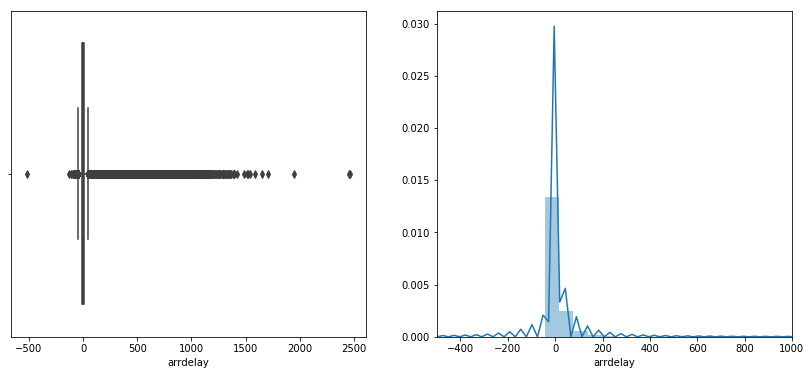

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(flights_data.arrdelay)
plt.subplot(1,2,2)
sns.distplot(flights_data.arrdelay)
plt.xlim((-500, 1000))

## Outliers in target variable

In [37]:
print("1st Quartile and 3rd quartile are {} and {} respectively".format(np.percentile(flights_data.arrdelay, 25),\
                                                                         np.percentile(flights_data.arrdelay, 75)))
target_iqr = 12 - (-10)
print("Interquartile Range is {}".format(target_iqr))
upper_bound = 12 + 1.5 * 22
lower_bound = -10 - 1.5 * 22

1st Quartile and 3rd quartile are -10.0 and 12.0 respectively
Interquartile Range is 22


In [40]:
flights_data[flights_data.arrdelay > upper_bound]

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,actualelapsedtime,...,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,240.0,...,3.0,7.0,0,Not cancelled,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,121.0,...,6.0,8.0,0,Not cancelled,0,8.0,0.0,0.0,0.0,72.0
26,2008,1,3,4,1422.0,1255,1657.0,1610,WN,155.0,...,6.0,6.0,0,Not cancelled,0,40.0,0.0,0.0,0.0,7.0
30,2008,1,3,4,2107.0,1945,2334.0,2230,WN,147.0,...,6.0,7.0,0,Not cancelled,0,5.0,0.0,0.0,0.0,59.0
37,2008,1,3,4,1812.0,1650,1927.0,1815,WN,135.0,...,6.0,11.0,0,Not cancelled,0,3.0,0.0,0.0,0.0,69.0
49,2008,1,3,4,2245.0,1730,2354.0,1850,WN,69.0,...,3.0,7.0,0,Not cancelled,0,282.0,0.0,0.0,0.0,22.0
53,2008,1,3,4,1038.0,945,1314.0,1225,WN,96.0,...,8.0,7.0,0,Not cancelled,0,7.0,0.0,0.0,0.0,42.0
77,2008,1,3,4,958.0,900,1052.0,950,WN,54.0,...,4.0,14.0,0,Not cancelled,0,0.0,0.0,4.0,0.0,58.0
81,2008,1,3,4,2248.0,2125,102.0,2345,WN,74.0,...,4.0,10.0,0,Not cancelled,0,7.0,0.0,0.0,0.0,70.0
82,2008,1,3,4,1327.0,1230,1550.0,1500,WN,83.0,...,3.0,15.0,0,Not cancelled,0,50.0,0.0,0.0,0.0,0.0


In [39]:
print("There doesn't seem to be anything wrong with the data for these potential outliers.\
However, From the boxplot above, it is evident that there are quite a lot of outliers for arrival delay")

There doesn't seem to be anything wrong with the data for these potential outliers.However, From the boxplot above, it is evident that there are quite a lot of outliers for arrival delay


In [85]:
# Plotting function

def plot_feature(dataframe, feature):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    if (is_numeric_dtype(dataframe[feature])):
        dataframe[feature].value_counts().sort_index().plot()
    elif (feature == "month" or feature == "dayofmonth" or feature == "dayofweek"):
        dataframe[feature].value_counts().sort_index().plot()
    elif (dataframe[feature].dtype.name == "category"):
        mean_sorted = dataframe.groupby(feature).arrdelay.mean()
        mean_levels = mean_sorted.sort_values().index.tolist()
        dataframe[feature].cat.reorder_categories(mean_levels, inplace=True)
        dataframe[feature].value_counts().plot()
    plt.ylabel("frequency")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.subplot(1,2,2)
    if (is_numeric_dtype(dataframe[feature])):
        mean_sorted = dataframe.groupby(feature).arrdelay.mean()
        std_sorted = dataframe.groupby(feature).arrdelay.std()
        mean_sorted.plot()
        plt.fill_between(range(len(std_sorted.index)), mean_sorted.values-std_sorted.values,\
                         mean_sorted.values + std_sorted.values, alpha=0.1)
    elif (feature == "month"):
        sns.boxplot(data=dataframe, x=feature, y="arrdelay", order=month_levels)
    elif (feature == "dayofmonth"):
        sns.boxplot(data=dataframe, x=feature, y="arrdelay", order=daymonth_levels)
    elif (feature == "dayofweek"):
        sns.boxplot(data=dataframe, x=feature, y="arrdelay", order=dayweek_levels)
    elif (dataframe[feature].dtype.name == "category"):
        sns.boxplot(data=dataframe, x=feature, y="arrdelay")
    plt.xticks(rotation=45)
    plt.ylabel("Arrival Delay")

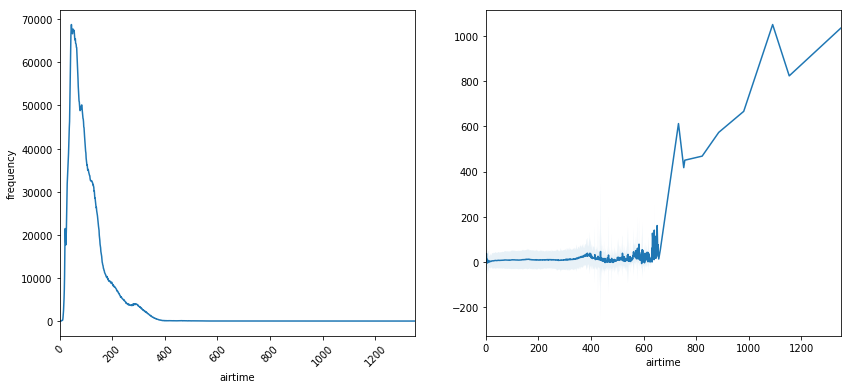

In [61]:
plot_feature(flights_data, "airtime")

A lot of the flights have air time between 100 and 300 and there are a few flights that have flight times highter than 400.

For flight times higher than 600 minutes, there seems to be a postive correlation between air time and arrival delays.

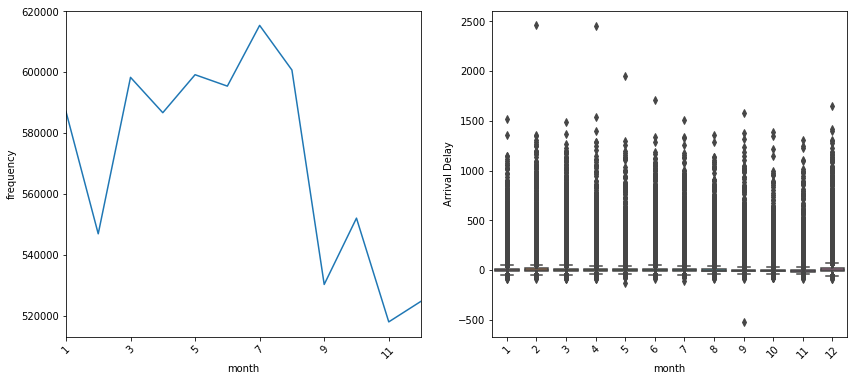

In [86]:
plot_feature(flights_data, "month")
# temp = flights_data.month.value_counts().sort_index().plot()

Between months February to August, a lot of flights were scheduled whereas the last few months had a decrease in number of flights. 

There does not seem to be any difference in the average arrival delays for each month.

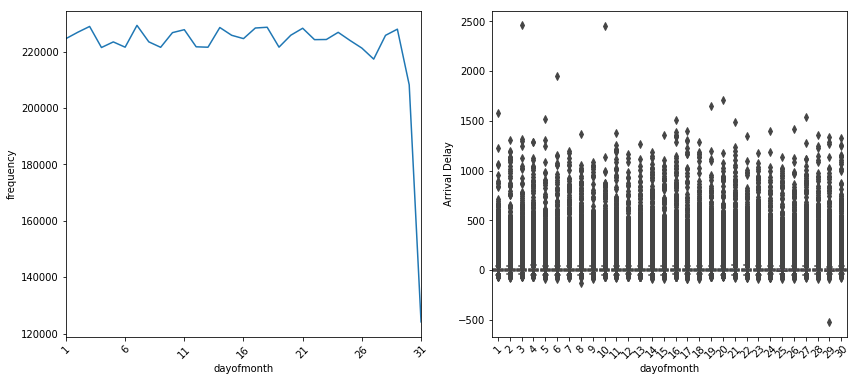

In [87]:
plot_feature(flights_data, "dayofmonth")

Except for last few days, there seem to be a constant number of flights in each day. The last few days may be due to february dates.

Arrival delays also seem to be constant across days.


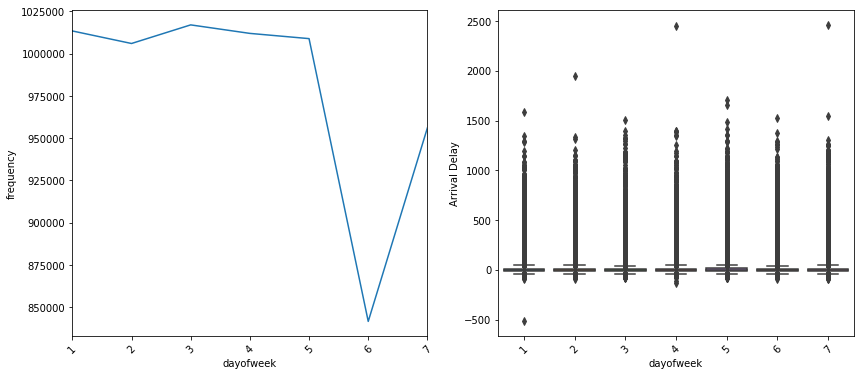

In [88]:
plot_feature(flights_data, "dayofweek")

There seems to be a drop in number of flights on saturdays.
Arrival delays seem to be constant across each week day.

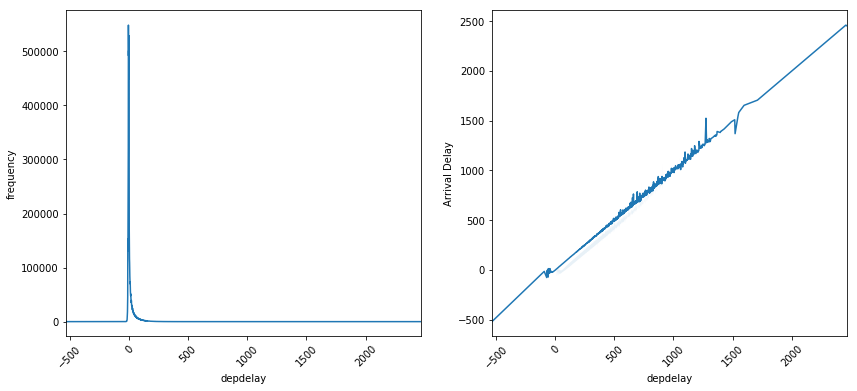

In [89]:
plot_feature(flights_data, "depdelay")

Delays seem to be between 0 and 100 minutes.
There seems to be a positive correlation between arrival delay and departure delay.

Text(0.5, 1.0, 'Flights in each month')

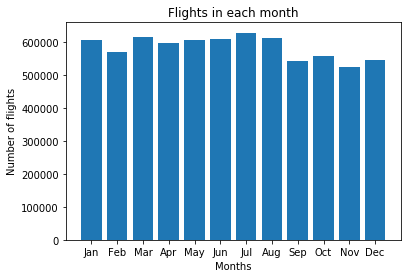

In [18]:
flights_date_indexed = flights_data.copy()
flights_date_indexed.index = flights_date_indexed["date"]
flights_months = flights_data.groupby(flights_date_indexed.index.month).distance.count()
plt.bar(range(1, 13), flights_months)
months_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months_ticks = np.arange(1, 13, 1)
plt.xticks(months_ticks, months_labels)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title("Flights in each month")


Number of flights are increasing by each year. In the year 1987, there seems to be a very small number of flights comparitively. This needs to looked into much deeper

There seems to be very few flights in Februaries that needs to be looked into further. Other than There seems to be a large number of flights in December, October and August.

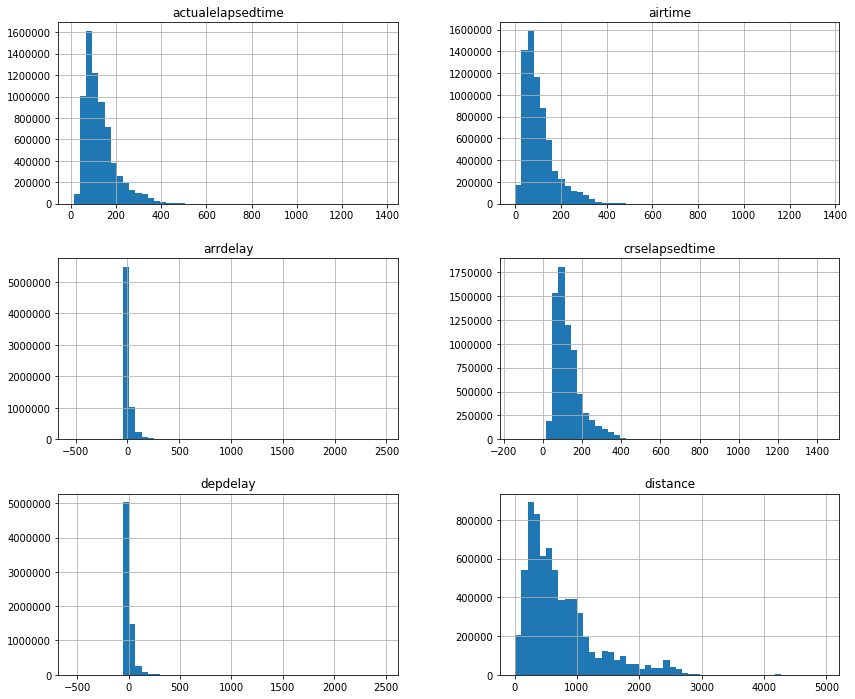

In [19]:
# plt.figure(figsize=(12,7))
# flights_data[["arrdelay", "depdelay"]].hist()
hist_cols = ["actualelapsedtime", "airtime", "arrdelay", "crselapsedtime", "depdelay", "distance"]
flights_data[hist_cols].hist(bins=50, figsize=(14,12));


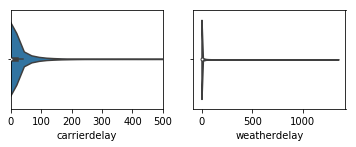

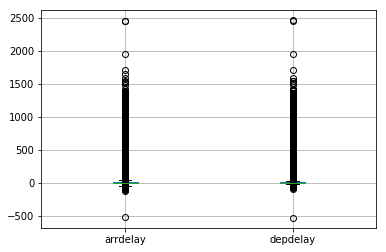

In [20]:
flights_data.boxplot(column=["arrdelay", "depdelay"])

There appear to be a lot of outliers in arrival and departure delays

Text(0, 0.5, 'Number of flights')

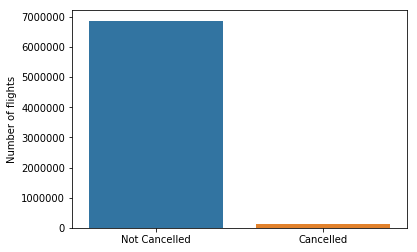

In [21]:
# cancelled_flights = flights_data.query("Cancelled == 0")["CancellationCode"]
sb.countplot(data=flights_data, x="cancelled")

plt.xticks([0,1], ["Not Cancelled", "Cancelled"])
plt.xlabel("")
plt.ylabel("Number of flights")

Text(0, 0.5, 'Number of flights')

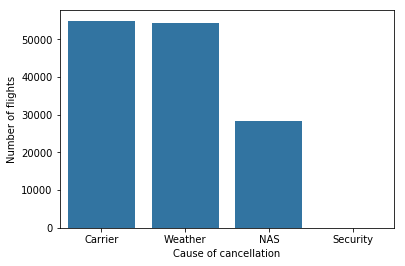

In [22]:

cancel_order = flights_data.cancellationcode.value_counts().index
sb.countplot(data=flights_data, x="cancellationcode", order=cancel_order, color=sb.color_palette()[0])
cancelCode_xticks = np.arange(0,4,1)
cancelCode_xticklabels = ["Carrier", "Weather", "NAS", "Security"]
plt.xticks(cancelCode_xticks, cancelCode_xticklabels)
plt.xlabel("Cause of cancellation")
plt.ylabel("Number of flights")

It seems like a large number of the flights were cancelled due to carrier and weather wherase only a very few was cancelled due to security issues.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

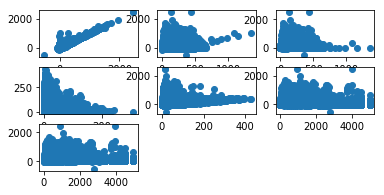

In [28]:
#Plot matrix for scatter plots
plt.subplot(4, 3, 1)
plt.scatter(flights_data.depdelay, flights_data.arrdelay)
plt.subplot(4, 3, 2)
plt.scatter(flights_data.airtime, flights_data.arrdelay)
plt.subplot(4, 3, 3)
plt.scatter(flights_data.airtime, flights_data.depdelay)
plt.subplot(4, 3, 4)
plt.scatter(flights_data.taxiin, flights_data.taxiout)
plt.subplot(4, 3, 5)
plt.scatter(flights_data.taxiout, flights_data.arrdelay)
plt.subplot(4, 3, 6)
plt.scatter(flights_data.distance, flights_data.arrdelay)
plt.subplot(4, 3, 7)
plt.scatter(flights_data.distance, flights_data.depdelay)
plt.subplots_adjust(bottom=0.5, right=0.8, top=0.9)


# scatter_matrix_atts = ["arrdelay", "depdelay", "airtime", "taxiin", "taxiout", "distance"]
# scatter_grid = sb.PairGrid(data=flights_data, vars=scatter_matrix_atts)

In [ ]:
scatter_grid.map_diag(plt.hist)
scatter_grid.map_offdiag(plt.scatter)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!